<a href="https://colab.research.google.com/github/lovelessbhartal12/machine-learning-codebase/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from re import IGNORECASE
import pandas as pd
import numpy as np

np.random.seed(42)


mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df = pd.DataFrame(data=class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1


mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class0_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df1 = pd.DataFrame(data=class0_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0


df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40).reset_index(drop=True)
df.head()



,feature1,feature2,feature3,target
0,1.296120,1.261055,1.005113,0
1,1.257550,0.925554,-0.918771,0
2,1.404051,2.886186,1.174578,0
3,0.927990,2.003533,1.361636,0
4,-1.057711,0.822545,-1.220844,1


In [22]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='feature1',
    y='feature2',
    z='feature3',
    color='target',
    color_discrete_map={0: 'blue', 1: 'red'},
    title='3D Scatter Plot of Synthetic Data',
    labels={'target': 'Class'}
)

fig.update_traces(marker=dict(size=6))
fig.show()


In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])
df.head()

,feature1,feature2,feature3,target
0,1.128750,0.645755,0.553298,0
1,1.076937,0.372534,-1.043604,0
2,1.273739,1.969207,0.693961,0
3,0.634222,1.250404,0.849227,0
4,-2.033271,0.288647,-1.294336,1


In [26]:
cov_matrix=np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
cov_matrix

array([[1.02564103, 0.35175   , 0.07987862],
       [0.35175   , 1.02564103, 0.28328008],
       [0.07987862, 0.28328008, 1.02564103]])

In [27]:
eigen_values,eigen_vectors=np.linalg.eig(cov_matrix)
print(eigen_values)
print(eigen_vectors)

[1.51825759 0.94771609 0.6109494 ]
[[-0.56014874 -0.62132881  0.5478904 ]
 [-0.67561935 -0.04005698 -0.73616162]
 [-0.47934526  0.78252536  0.3973439 ]]


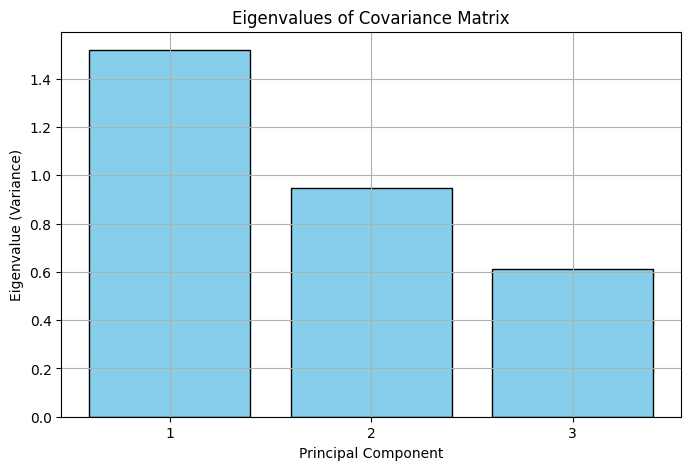

In [28]:
import matplotlib.pyplot as plt

# Bar plot for eigenvalues
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigen_values)+1), eigen_values, color='skyblue', edgecolor='black')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance)')
plt.title('Eigenvalues of Covariance Matrix')
plt.xticks([1, 2, 3])
plt.grid(True)
plt.show()


In [30]:
pc=eigen_vectors[0:2]
pc

array([[-0.56014874, -0.62132881,  0.5478904 ],
       [-0.67561935, -0.04005698, -0.73616162]])

In [32]:
transormed_df=np.dot(df.iloc[:,0:3],pc.T)
new_df=pd.DataFrame(transormed_df,columns=['PC1','PC2'])
new_df['target']=df['target']
new_df.head()

,PC1,PC2,target
0,-0.730348,-1.195790,0
1,-1.406492,0.025739,0
2,-1.556794,-1.450310,0
3,-0.666888,-1.103748,0
4,0.250435,2.314996,1


In [33]:
import plotly.express as px

fig = px.scatter(
    new_df,
    x='PC1',
    y='PC2',
    color='target',
    color_discrete_map={0: 'blue', 1: 'red'},
    title='2D PCA Projection (PC1 vs PC2)',
    labels={'target': 'Class'}
)

fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')))
fig.show()
